# Projet final - Python - Henri de Montalembert

In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Importation des données

In [2]:
subjects = []
for i in range(1,16):
    if i != 6:
        print(i)
        name = "S"+str(i)+".pkl"
        file = open(name, "rb")
        subjects.append(pickle.load(file,encoding='latin1'))

1
2
3
4
5
7
8
9
10
11
12
13
14
15


## Premiere visualisation des données sur le premier individu 

In [93]:
file = open( "S1.pkl", "rb")
#file = open( "/Users/henri/Desktop/S9/Python/Projet_final/PPG_FieldStudy/S7/S7.pkl", "rb")
datas= pickle.load(file,encoding='latin1')
#pickle.dump(data, file)

In [4]:
datas["questionnaire"]

{'WEIGHT': 78.0,
 'Gender': ' m',
 'AGE': 34,
 'HEIGHT': 182.0,
 'SKIN': 3,
 'SPORT': 6}

In [5]:
columns = []
for data in datas:
    columns.append(data)
columns

['rpeaks', 'signal', 'label', 'activity', 'questionnaire', 'subject']

In [3]:
len(subjects[0]["label"])

4603

In [4]:
len(subjects[0]["activity"])

36848

In [6]:
4603*8

36824

In [11]:
len(datas["signal"]["chest"]["ACC"])

6448400

In [14]:
len(datas["signal"]["chest"]["EMG"])

6448400

In [34]:
datas["signal"]["chest"]["EDA"]

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [6]:
print("Chest")
for index , valeur in enumerate(datas["signal"]["chest"]):
    print(valeur + " : "+ str(len(datas["signal"]["chest"][valeur])))
print("")
print("Wrist : ")
for index , valeur in enumerate(datas["signal"]["wrist"]):
    print(valeur + " : "+ str(len(datas["signal"]["wrist"][valeur])))

Chest
ACC : 6448400
ECG : 6448400
EMG : 6448400
EDA : 6448400
Temp : 6448400
Resp : 6448400

Wrist : 
ACC : 294784
BVP : 589568
EDA : 36848
TEMP : 36848


In [133]:
print("Activity :")
print(len(datas["activity"]))
#print(len(datas["activity"][datas["activity"] != 0]))

Activity :
36848


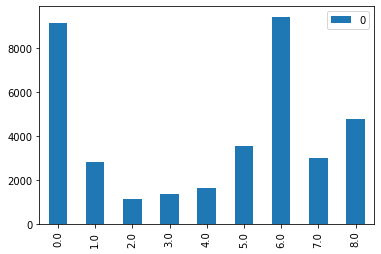

In [84]:
import numpy as np
unique, counts = np.unique(datas["activity"], return_counts=True)
pd.DataFrame.from_dict(dict(zip(unique, counts)),orient='index').plot(kind="bar")

In [75]:
dict(zip(unique, counts))

{0.0: 9124,
 1.0: 2800,
 2.0: 1148,
 3.0: 1380,
 4.0: 1648,
 5.0: 3556,
 6.0: 9420,
 7.0: 3016,
 8.0: 4756}

In [ ]:
#Le subject 1 a réalisé toutes les activités

In [65]:
type(datas["activity"])

numpy.ndarray

In [33]:
activitiesS1 = pd.DataFrame(datas["activity"]).reset_index()

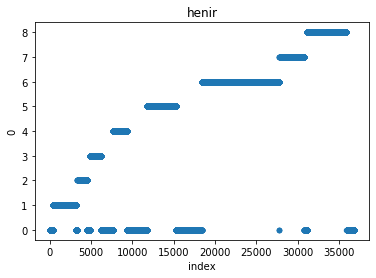

In [128]:
activitiesS1.plot.scatter(x='index',y=0,title ="henir")

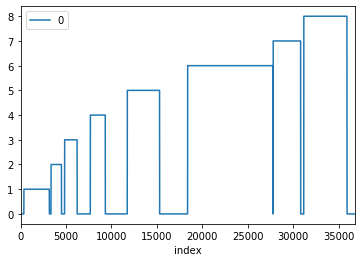

In [133]:
activitiesS1.plot(x='index',y=0,kind='line')

Text(0, 0.5, 'Activity')

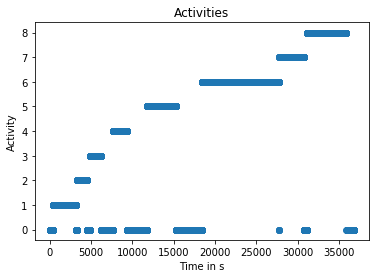

In [34]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter( activitiesS1["index"],activitiesS1[0])
# set a title and labels
ax.set_title('Activities')
ax.set_xlabel('Time in s')
ax.set_ylabel('Activity')

In [135]:
datas["signal"]["chest"]["ECG"]*100

array([[ 1.56097412],
       [ 1.81274414],
       [ 1.75323486],
       ...,
       [21.3684082 ],
       [21.55609131],
       [21.70257568]])

In [143]:
print(datas["label"].min())
print(datas["label"].max()

150.15457212632637

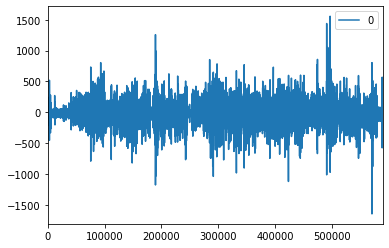

In [97]:
pd.DataFrame(datas["signal"]["wrist"]["BVP"]).plot()

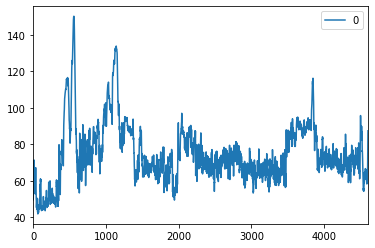

In [98]:
pd.DataFrame(datas["label"]).plot()

# Création de mes dataframe

### Deux approches différentes :
### La premiere utilise seulement la fréquence cardiaque (en les mettant à la mme echelle que le tableau d'activity ) et les carctéristiques des individus
### La deuxième prend tous les signaux et les mets à la meme echelle que le tableau d'activité ainsi que les caractéristiques des individus


### Creation de la dataframe 2 : la deuxieme approche :

In [3]:
import datetime
from statistics import mean
ACC_chest_0 = []
ACC_chest_1 = []
ACC_chest_2 = []

ACC_wrist_0 = []
ACC_wrist_1 = []
ACC_wrist_2 = []
ECG = []
Resp = []
BVP = []


ACC_chest_temp_0 = []
ACC_chest_temp_1 = []
ACC_chest_temp_2 = []
ACC_wrist_temp_0 = []
ACC_wrist_temp_1 = []
ACC_wrist_temp_2 = []
BVP_temp = []
ECG_temp = []
Resp_temp = []
Activities = []
mondico = {}

for sujet in subjects: 
    lenACC = len(sujet["signal"]["chest"]["ACC"])
    lenACC_wrist = len(sujet["signal"]["wrist"]["ACC"])
    lenBVP = len(sujet["signal"]["wrist"]["BVP"])
    lenActivity = len(sujet["activity"])
    diviseur = lenACC / lenActivity
    diviseur2 = len(sujet["signal"]["wrist"]["ACC"]) / lenActivity
    diviseur3 = len(sujet["signal"]["wrist"]["BVP"]) / lenActivity
    print(diviseur)
    print(diviseur2)
    print(diviseur3)
    print(lenACC)
    print(sujet["subject"])
    print(datetime.datetime.now())
    for valeur in range(lenACC):
        ACC_chest_temp_0.append(sujet["signal"]["chest"]["ACC"][valeur][0])
        ACC_chest_temp_1.append(sujet["signal"]["chest"]["ACC"][valeur][1])
        ACC_chest_temp_2.append(sujet["signal"]["chest"]["ACC"][valeur][2])
        ECG_temp.append(float(sujet["signal"]["chest"]["ECG"][valeur]))
        Resp_temp.append(float(sujet["signal"]["chest"]["Resp"][valeur]))
        if valeur < lenACC_wrist:
            ACC_wrist_temp_0.append(sujet["signal"]["wrist"]["ACC"][valeur][0])
            ACC_wrist_temp_1.append(sujet["signal"]["wrist"]["ACC"][valeur][1])
            ACC_wrist_temp_2.append(sujet["signal"]["wrist"]["ACC"][valeur][2])
        
        if valeur < lenBVP:
            BVP_temp.append(float(sujet["signal"]["wrist"]["BVP"][valeur]))
        
        if valeur%diviseur == 0 and valeur !=0:
            ACC_chest_0.append(mean(ACC_chest_temp_0))
            ACC_chest_1.append(mean(ACC_chest_temp_1))
            ACC_chest_2.append(mean(ACC_chest_temp_2))
            ECG.append(mean(ECG_temp))
            Resp.append(mean(Resp_temp))
            ACC_chest_temp_0=[] 
            ACC_chest_temp_1=[] 
            ACC_chest_temp_2=[]
            ECG_temp = []
            Resp_temp = []
            
        if valeur%diviseur2 == 0 and valeur !=0 and valeur <lenACC_wrist:
            ACC_wrist_0.append(mean(ACC_wrist_temp_0))
            ACC_wrist_1.append(mean(ACC_wrist_temp_1))
            ACC_wrist_2.append(mean(ACC_wrist_temp_2))
            
            ACC_wrist_temp_0 = []
            ACC_wrist_temp_1 = []
            ACC_wrist_temp_2 = []
        
        if valeur%diviseur3 == 0 and valeur !=0 and valeur < lenBVP:
            BVP.append(mean(BVP_temp))
            BVP_temp = []
        
            

175.0
8.0
16.0
6448400
S1
2020-01-31 11:28:08.274179
175.0
8.0
16.0
5743500
S2
2020-01-31 11:29:39.333453
175.0
8.0
16.0
6118700
S3
2020-01-31 11:30:55.391321
175.0
8.0
16.0
6405000
S4
2020-01-31 11:32:14.549266
175.0
8.0
16.0
6513500
S5
2020-01-31 11:33:40.413829
175.0
8.0
16.0
6540100
S7
2020-01-31 11:35:09.474987
175.0
8.0
16.0
5656000
S8
2020-01-31 11:36:37.267538
175.0
8.0
16.0
5992000
S9
2020-01-31 11:37:48.854482
175.0
8.0
16.0
7453600
S10
2020-01-31 11:39:05.690006
175.0
8.0
16.0
6333600
S11
2020-01-31 11:40:40.622569
175.0
8.0
16.0
5539800
S12
2020-01-31 11:42:01.594687
175.0
8.0
16.0
6395200
S13
2020-01-31 11:43:12.103948
175.0
8.0
16.0
6270600
S14
2020-01-31 11:44:33.269348
175.0
8.0
16.0
5557300
S15
2020-01-31 11:45:52.187008


In [308]:
len(ACC_chest_0) , len(ACC_chest_1),len(ACC_chest_2)

(496942, 496942, 496942)

In [309]:
len(ACC_wrist_0),len(ACC_wrist_1),len(ACC_wrist_2)

(496942, 496942, 496942)

In [310]:
len(BVP) , len(ECG) , len(Resp)

(496942, 496942, 496942)

In [318]:
len(subjects[0]["activity"]) , len(subjects[1]["activity"])

(36848, 32820)

In [28]:
Activ = []
Gender = []
Age = []
Height = []
Skin = []
Sport =[]
Labels = [] 
compt=0
nbpers = len(subjects)
for i in range(nbpers):
    taille = len(subjects[i]["activity"])-1
    print(i)
    Activ.extend(subjects[i]["activity"][:taille])
    for v in range(taille):
        Gender.append(subjects[i]["questionnaire"]["Gender"].strip())
        Age.append(subjects[i]["questionnaire"]["AGE"])
        Height.append(subjects[i]["questionnaire"]["HEIGHT"])
        Skin.append(subjects[i]["questionnaire"]["SKIN"])
        Sport.append(subjects[i]["questionnaire"]["SPORT"])
        if v%8 == 0 and v !=0 :
            compt+=1
        if compt < len(subjects[i]["label"]):
            #print(subjects[i]["label"][compt])
            Labels.append(subjects[i]["label"][compt])
        else: Labels.append(9)
    compt=0

0
1
2
3
4
5
6
7
8
9
10
11
12
13


In [33]:
df2 = pd.DataFrame(columns=["Gender","Age","Height","Skin","Sport","ACC_chest_0","ACC_chest_1","ACC_chest_2","ACC_wrist_0","ACC_wrist_1","ACC_wrist_2","BVP","ECG","Resp","Labels","Activ"])
df2["Gender"] = Gender
df2["Age"] = Age
df2["Height"]=Height
df2["Skin"] = Skin
df2["Sport"] = Sport
df2["ACC_chest_0"]= ACC_chest_0
df2["ACC_chest_1"]=ACC_chest_1
df2["ACC_chest_2"]=ACC_chest_2
df2["ACC_wrist_0"]=ACC_wrist_0
df2["ACC_wrist_1"]=ACC_wrist_1
df2["ACC_wrist_2"]=ACC_wrist_2
df2["BVP"]=BVP
df2["ECG"]=ECG
df2["Resp"]=Resp
df2["Labels"]=Labels
df2["Activ"]=Activ


In [35]:
print(len(df2["Labels"][df2["Labels"] == 9]))
print(len(df2["Labels"][df2["Labels"] != 9]))

342
496600


### Création de la dataframe 1 = premiere approche

In [54]:

import datetime
df = pd.DataFrame(columns=['Gender','Age','Height','Skin','Sport','HearthRate', 'Activity'])
compt = 0
for sujet in subjects: 
    print(sujet["subject"])
    print(datetime.datetime.now())
    for valeur in range(len(sujet["label"])):
        gender = sujet["questionnaire"]["Gender"].strip()
        age = sujet["questionnaire"]["AGE"]
        taille = sujet["questionnaire"]["HEIGHT"]
        skin = sujet["questionnaire"]["SKIN"]
        sport = sujet["questionnaire"]["SPORT"]
        label = sujet["label"][valeur]
        activ = sujet["activity"][compt]
        df =df.append({"Gender":gender,"Age":age,"Height":taille,"Skin":skin,"Sport":sport,"HearthRate":label,"Activity":activ},ignore_index=True)
        compt+=8
    compt = 0


S1
2020-01-27 00:15:26.433474
S2
2020-01-27 00:15:57.327126
S3
2020-01-27 00:16:34.981514
S4
2020-01-27 00:17:19.911095
S5
2020-01-27 00:18:28.484986
S7
2020-01-27 00:19:53.937078
S8
2020-01-27 00:21:23.229931
S9
2020-01-27 00:23:06.421649
S10
2020-01-27 00:24:55.632802
S11
2020-01-27 00:27:41.641457
S12
2020-01-27 00:30:14.127633
S13
2020-01-27 00:32:30.833722
S14
2020-01-27 00:35:14.982811
S15
2020-01-27 00:38:12.146077


In [463]:
print(df["Height"].value_counts())
print(df2["Height"].value_counts())

168.0    13761
170.0    13408
164.0     5321
180.0     4649
182.0     4603
167.0     4277
189.0     4099
179.0     4037
183.0     3966
195.0     3954
Name: Height, dtype: int64
168.0    110161
170.0    107337
164.0     42591
180.0     37219
182.0     36847
167.0     34239
189.0     32819
179.0     32319
183.0     31755
195.0     31655
Name: Height, dtype: int64


In [9]:
#print(df["Activity"].value_counts())
print(df2["Activ"].value_counts())

[0.0]    131130
[6.0]    108412
[8.0]     68020
[5.0]     50556
[7.0]     37564
[1.0]     34048
[4.0]     25700
[2.0]     24232
[3.0]     17280
Name: Activ, dtype: int64


In [473]:
print(df2["Gender"].value_counts())

2    259985
1    236957
Name: Gender, dtype: int64


In [464]:
df.head()

,Unnamed: 0,Gender,Age,Height,Skin,Sport,HearthRate,Activity
0,0,1,34,182.0,3,6,49.611369,0
1,1,1,34,182.0,3,6,50.323992,0
2,2,1,34,182.0,3,6,52.708336,0
3,3,1,34,182.0,3,6,55.640794,0
4,4,1,34,182.0,3,6,57.658406,0


In [53]:
df2["Activ"].value_counts()

0    130788
6    108412
8     68020
5     50556
7     37564
1     34048
4     25700
2     24232
3     17280
Name: Activ, dtype: int64

### Quelques modifications 

In [57]:
df["Activity"] = df["Activity"].astype(int)
df = pd.get_dummies( df, columns = ["Gender"] )
df = df[["Gender_m","Gender_f","Age","Height","Skin","Sport","HearthRate","Activity"]]

In [51]:
df2["Activ"] = [int(str(df2["Activ"][index])[1:-2]) for index ,value in enumerate(df2["Activ"])]
df2 = pd.get_dummies( df2, columns = ["Gender"] )
df2 = df2[df2["Labels"]!=9]
df2 = df2[["Gender_m","Gender_f","Age","Height","Skin","Sport","ACC_chest_0","ACC_chest_1","ACC_chest_2","ACC_wrist_0","ACC_wrist_1","ACC_wrist_2","BVP","ECG","Resp","Labels","Activ"]]

### Recupération de mes dataframe enregistré en préalable pour éviter de les charger une deuxieme fois

In [63]:
#Recupération de mes dataframe enregistré en préalable 
df = pd.read_csv("deuxiemeDF.csv")
df2 = pd.read_csv("df2.csv")
df.drop(columns=["Unnamed: 0"],inplace=True)
df2.drop(columns=["Unnamed: 0"],inplace=True)

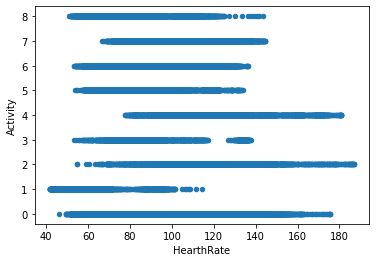

In [181]:
df.plot.scatter(x="HearthRate",y="Activity")

In [64]:
df.head()

,Gender_m,Gender_f,Age,Height,Skin,Sport,HearthRate,Activity
0,1,0,34,182.0,3,6,49.611369,0
1,1,0,34,182.0,3,6,50.323992,0
2,1,0,34,182.0,3,6,52.708336,0
3,1,0,34,182.0,3,6,55.640794,0
4,1,0,34,182.0,3,6,57.658406,0


In [65]:
df2.head()

,Gender_m,Gender_f,Age,Height,Skin,Sport,ACC_chest_0,ACC_chest_1,ACC_chest_2,ACC_wrist_0,ACC_wrist_1,ACC_wrist_2,BVP,ECG,Resp,Activ
0,1,0,34,182.0,3,6,0.852152,-0.066482,-0.367790,-0.763889,-0.076389,0.670139,-0.538235,0.035358,4.834678,0
1,1,0,34,182.0,3,6,0.851262,-0.066659,-0.370454,-0.763672,-0.078125,0.671875,-28.756875,0.103185,4.230059,0
2,1,0,34,182.0,3,6,0.851616,-0.064659,-0.370213,-0.759766,-0.078125,0.671875,-37.401875,0.097211,2.043701,0
3,1,0,34,182.0,3,6,0.852094,-0.065510,-0.371309,-0.755859,-0.078125,0.671875,25.966250,-0.169330,-0.476641,0
4,1,0,34,182.0,3,6,0.851957,-0.065895,-0.370439,-0.759766,-0.076172,0.671875,24.570000,-0.036095,-1.870065,0


In [366]:
df2.describe()

,Gender,Age,Height,Skin,Sport,ACC_chest_0,ACC_chest_1,ACC_chest_2,ACC_wrist_0,ACC_wrist_1,ACC_wrist_2,BVP,ECG,Resp,Activ
count,496942.000000,496942.000000,496942.000000,496942.000000,496942.000000,496942.000000,496942.000000,496942.000000,496942.000000,496942.000000,496942.000000,496942.000000,496942.000000,496942.000000,496942.000000
mean,1.523170,30.257016,174.737758,3.164353,4.775078,0.867694,-0.003780,-0.091069,-0.520602,0.089713,0.359017,-0.000893,0.001086,0.048847,3.918993
std,0.499463,10.135502,8.946138,0.514921,0.959642,0.115435,0.094922,0.280187,0.316298,0.628948,0.386260,69.980503,0.136689,4.397025,2.984394
min,1.000000,21.000000,164.000000,2.000000,2.000000,-0.620329,-0.851983,-0.952922,-1.908203,-1.937500,-1.818359,-1360.401250,-1.430011,-49.979893,0.000000
25%,1.000000,24.000000,168.000000,3.000000,5.000000,0.817267,-0.065134,-0.251266,-0.781250,-0.351562,0.115234,-25.395000,-0.059347,-2.285895,0.000000
50%,2.000000,26.000000,170.000000,3.000000,5.000000,0.890144,-0.008874,-0.080831,-0.505859,-0.015625,0.345703,1.581250,-0.000411,-0.104270,5.000000
75%,2.000000,34.000000,182.000000,3.000000,5.000000,0.913683,0.052049,0.089801,-0.296875,0.644531,0.691406,27.418750,0.061391,2.288182,6.000000
max,2.000000,55.000000,195.000000,4.000000,6.000000,1.615166,0.790016,1.368031,1.324219,1.980469,1.683594,1386.401250,1.449997,49.974470,8.000000


### Pour retirer les activity = 0 mais dans notre cas nous allons les garder 

In [16]:
#df = df[df["Activity"]!=0]
#df2 = df2[df2["Activ"]!=0]

In [537]:
df2.head()

,Gender,Age,Height,Skin,Sport,ACC_chest_0,ACC_chest_1,ACC_chest_2,ACC_wrist_0,ACC_wrist_1,ACC_wrist_2,BVP,ECG,Resp,Activ
360,1,34,182.0,3,6,0.797880,-0.061398,-0.482296,-0.423828,-0.070312,0.908203,-14.993125,0.156596,-7.090524,1
361,1,34,182.0,3,6,0.790378,-0.062943,-0.498313,-0.421875,-0.074219,0.917969,-44.176875,0.104828,-6.616316,1
362,1,34,182.0,3,6,0.793942,-0.064722,-0.495574,-0.421875,-0.070312,0.908203,20.944375,-0.189420,-5.916112,1
363,1,34,182.0,3,6,0.787776,-0.063497,-0.501667,-0.421875,-0.076172,0.910156,22.923125,-0.070157,-5.816607,1
364,1,34,182.0,3,6,0.788554,-0.063352,-0.501888,-0.421875,-0.074219,0.914062,-0.040625,0.010568,-5.342843,1


In [54]:
#Création de deux csv pour ne pas avoir besoin de tout réexécuter 
#df.to_csv("deuxiemeDF.csv")
#df2.to_csv("df2.csv")

# Creation du model 

In [55]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix , accuracy_score
import seaborn as sn
from  sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from pprint import pprint
from sklearn.metrics import classification_report
import numpy as np
%matplotlib inline

In [56]:
def featureImportances(algo,X_train):
    feature_list = list(X_train.columns)
    importances = list(algo.feature_importances_)
    feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
    [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]
    plt.style.use('fivethirtyeight')
    x_values = list(range(len(importances)))
    plt.bar(x_values, importances, orientation = 'vertical')
    plt.xticks(x_values, feature_list, rotation='vertical')
    plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances')
    plt.show()

In [58]:
#X = df.iloc[:,0:df.shape[1]-1]
X2 = df2.iloc[:,0:df2.shape[1]-1]

In [59]:
#y = df["Activity"]
y2 = df2["Activ"]

In [60]:
#X_train , X_test , Y_train , Y_test = train_test_split(X,y,test_size=0.25,random_state=1234)
X_train2 , X_test2 , Y_train2 , Y_test2 = train_test_split(X2,y2,test_size=0.25,random_state=1234)

In [71]:
#X_train.shape , X_test.shape ,Y_train.shape, Y_test.shape

((46556, 7), (15519, 7), (46556,), (15519,))

In [61]:
X_train2.shape , X_test2.shape ,Y_train2.shape, Y_test2.shape

((372450, 16), (124150, 16), (372450,), (124150,))

## Decision tree

### Premiere approche

In [73]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,Y_train)
print(tree.score(X_test,Y_test))
predictionDecisionTree = tree.predict(X_test)

0.38932920935627296


In [382]:
prediction[0:10]

array([4, 5, 8, 8, 0, 6, 6, 8, 6, 6])

In [383]:
Y_test[0:10]

28289    0
16426    6
11810    6
48550    8
6911     0
20125    6
24445    0
52307    6
11008    6
19936    6
Name: Activity, dtype: int64

### Deuxieme approche

In [62]:
tree2 = DecisionTreeClassifier(random_state=0)
tree2.fit(X_train2,Y_train2)
print(tree2.score(X_test2,Y_test2))
predictionDecisionTree2 = tree2.predict(X_test2)

0.8475795408779702


In [64]:
predictionDecisionTree2[0:10]

array([6, 4, 6, 0, 0, 6, 8, 4, 1, 1])

In [65]:
Y_test2[0:10]

168729    7
225204    4
144208    0
144379    0
124031    0
141140    0
69944     0
258765    4
1040      1
217401    1
Name: Activ, dtype: int64

In [66]:
cm = confusion_matrix(Y_test2,predictionDecisionTree2)
print(cm)

[[25107   117  1431   540   145   464  1757  2548   410]
 [   90  8300     0     2     0    15    49     1    15]
 [ 1550     1  3920    14    68     6   116   381    19]
 [  522     3    29  3509    34    10   191    37    33]
 [  160     0    83    37  6108     2    19    19    11]
 [  473     6     3     8     2 11834   180    37   232]
 [ 1614    38   104   173    27   147 24271   340   340]
 [ 2494     4   320    40    16    32   320  6157    57]
 [  380    16    15    25     7   178   322    44 16021]]


In [459]:
Y_test.unique()

array([6, 1, 4, 2, 8, 3, 5, 7])

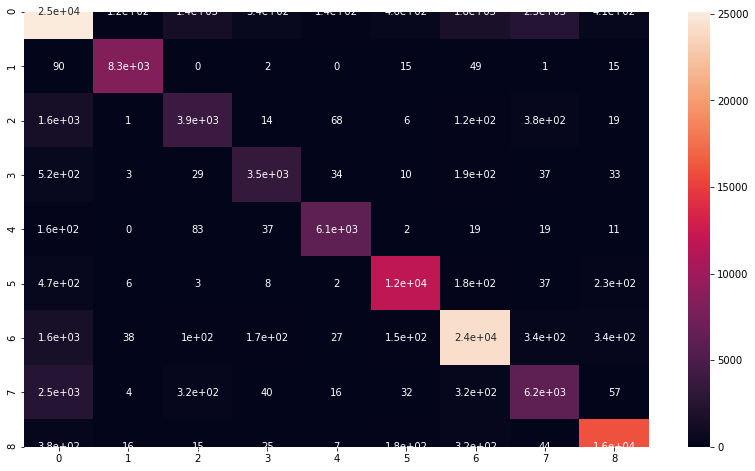

In [67]:
plt.figure(figsize=(14, 8))
sn.heatmap(cm, annot=True)

In [406]:
print(accuracy_score(Y_test2,predictionDecisionTree2))

0.7953330757590392


Variable: Labels               Importance: 0.19
Variable: ACC_wrist_1          Importance: 0.15
Variable: ACC_chest_2          Importance: 0.14
Variable: ACC_wrist_2          Importance: 0.1
Variable: ACC_chest_0          Importance: 0.08
Variable: ACC_chest_1          Importance: 0.08
Variable: Height               Importance: 0.06
Variable: ACC_wrist_0          Importance: 0.05
Variable: Age                  Importance: 0.04
Variable: Sport                Importance: 0.02
Variable: BVP                  Importance: 0.02
Variable: ECG                  Importance: 0.02
Variable: Resp                 Importance: 0.02
Variable: Gender_m             Importance: 0.01
Variable: Skin                 Importance: 0.01
Variable: Gender_f             Importance: 0.0


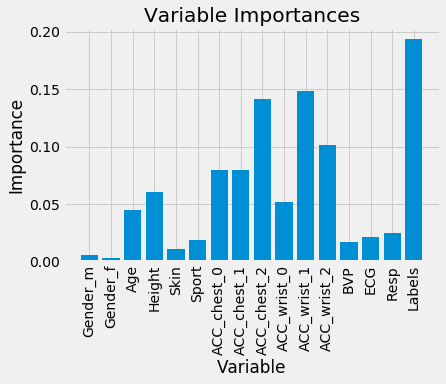

In [68]:
featureImportances(tree2,X_train2)

Grid Search 

In [69]:
grid_valuesArbre = {'criterion': ['gini', 'entropy'],'min_samples_split':[2,5,8,10],'max_features':['sqrt','log2',None]}
pprint(grid_valuesArbre)
#Apprentissage
grid_Arbre = GridSearchCV(DecisionTreeClassifier(), param_grid = grid_valuesArbre,scoring = 'accuracy',cv=KFold(n_splits=5,shuffle=True), verbose=1)
grid_Arbre.fit(X_train2, Y_train2)

#grid_Arbre.cv_results_
#sorted(grid_Arbre.cv_results_.keys())
pprint(grid_Arbre.best_params_)

#Predictions
grid_predictions_Arbre = grid_Arbre.predict(X_test2)

{'criterion': ['gini', 'entropy'],
 'max_features': ['sqrt', 'log2', None],
 'min_samples_split': [2, 5, 8, 10]}
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [76]:
print(grid_Arbre.score(X_test2,Y_test2))

0.8039296178241412


## Random forest

### Premiere approche

In [77]:
random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(X_train,Y_train)
print(random_forest.score(X_test,Y_test))
predictionRandomForest = random_forest.predict(X_test)

0.39036020362136736


### Deuxieme approche

In [70]:
#paramètres trouvés grâce au grid search
random_forest2 = RandomForestClassifier(bootstrap= False,
 max_depth= 40,
 max_features= 'auto',
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 140)
random_forest2.fit(X_train2,Y_train2)
print(random_forest2.score(X_test2,Y_test2))
predictionRandomForest2 = random_forest2.predict(X_test2)

0.9174063632702376


Meilleure précision 

In [71]:
target_name = ['0 Nothing','1 Sitting','2 Stairs','3 Table soccer','4 Cycling','5 Driving Car','6 Lunch','7 Walking','8 Working']
print(classification_report(Y_test2, predictionRandomForest2,target_names=target_name))

                precision    recall  f1-score   support

     0 Nothing       0.82      0.92      0.87     32519
     1 Sitting       1.00      0.99      0.99      8472
      2 Stairs       0.89      0.70      0.79      6075
3 Table soccer       0.93      0.88      0.90      4368
     4 Cycling       0.98      0.99      0.98      6439
 5 Driving Car       0.97      0.98      0.97     12775
       6 Lunch       0.96      0.93      0.95     27054
     7 Walking       0.85      0.73      0.78      9440
     8 Working       0.98      0.96      0.97     17008

     micro avg       0.92      0.92      0.92    124150
     macro avg       0.93      0.90      0.91    124150
  weighted avg       0.92      0.92      0.92    124150



In [72]:
cm = confusion_matrix(Y_test2,predictionRandomForest2)
print(cm)

[[29982    29   383   189    84   272   531   925   124]
 [   67  8364     0     0     0     7    26     0     8]
 [ 1666     0  4253     5    29     1     4   116     1]
 [  435     0     0  3827    20     0    74     6     6]
 [   55     0    26     6  6347     0     2     3     0]
 [  121     1     0     0     0 12525    80     6    42]
 [ 1374     2     6    72     8    50 25295   180    67]
 [ 2384     0    88     2     6    10    47  6898     5]
 [  269     2     0    17     4    98   193    20 16405]]


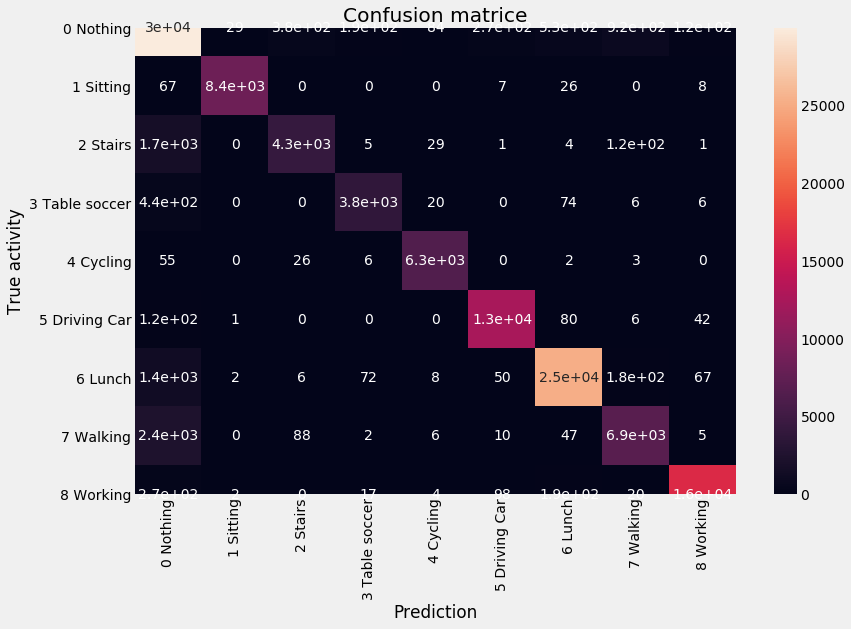

In [73]:
fig = plt.figure(figsize=(12, 8))
ax = plt.subplot()
sn.heatmap(cm,ax=ax, annot=True)
ax.set_xlabel("Prediction")
ax.set_ylabel("True activity")
ax.set_title("Confusion matrice")
ax.xaxis.set_ticklabels(['0 Nothing','1 Sitting','2 Stairs','3 Table soccer','4 Cycling','5 Driving Car','6 Lunch','7 Walking','8 Working'],rotation='vertical');
ax.yaxis.set_ticklabels(['0 Nothing','1 Sitting','2 Stairs','3 Table soccer','4 Cycling','5 Driving Car','6 Lunch','7 Walking','8 Working'],rotation='horizontal');

Variable: ACC_wrist_1          Importance: 0.18
Variable: ACC_chest_2          Importance: 0.17
Variable: ACC_chest_0          Importance: 0.12
Variable: ACC_wrist_2          Importance: 0.11
Variable: ACC_chest_1          Importance: 0.09
Variable: ACC_wrist_0          Importance: 0.09
Variable: Height               Importance: 0.06
Variable: Age                  Importance: 0.05
Variable: Sport                Importance: 0.03
Variable: Resp                 Importance: 0.03
Variable: Gender               Importance: 0.02
Variable: Skin                 Importance: 0.02
Variable: BVP                  Importance: 0.02
Variable: ECG                  Importance: 0.02


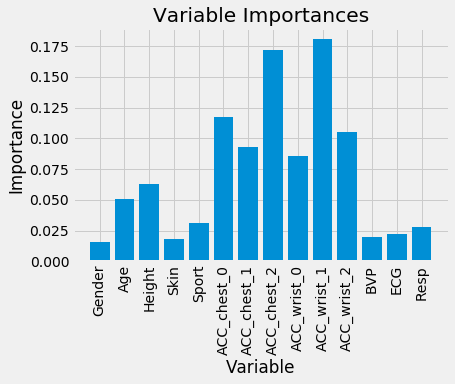

In [561]:
featureImportances(random_forest2,X_train2)

### Grid search 

In [82]:
# Parametres qu'on veut tester
# Nombre d'arbres de la foret
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 10)]
# Nombre de de colonnes a considerer pour chaque split
max_features = ['auto', 'sqrt']
# Profondeur de chaque arbre
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Nombre minimum d'individus dans un noeud pour faire un split
min_samples_split = [2, 5, 10]
# Nombre minimum d'individus requis a chaque feuille
min_samples_leaf = [1, 2, 4]
# Application de la methode bootstrap
bootstrap = [True, False]
grid_valuesRF = {'n_estimators':n_estimators ,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(grid_valuesRF)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200]}


In [83]:
grid_RF = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = grid_valuesRF, n_iter = 100,scoring = 'accuracy', cv = KFold(n_splits=4,shuffle=True), verbose=2, random_state=42, n_jobs = -1)
grid_RF.fit(X_train2, Y_train2)
pprint(grid_RF.best_params_)
grid_predictions_RF = grid_RF.predict(X_test2)
# Evaluation du modele
grid_RF_acc = accuracy_score(Y_test2, grid_predictions_RF, normalize=True, sample_weight=None)
grid_RF_acc

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 42.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 182.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 389.9min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 427.3min finished


{'bootstrap': False,
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 140}


0.8764609291992659

### Enregistrement du model 

In [76]:
from sklearn.externals import joblib

In [77]:
joblib.dump(random_forest2,"random_forest2.sav")

['random_forest2.sav']

In [85]:
joblib.dump(random_forest2,"grid_RF.sav")

['grid_RF.sav']

### Load model

In [86]:
#load_model = joblib.load("random_forest2.sav")
load_model = joblib.load("random_forest2.sav")

In [87]:
PredLoad = load_model.predict(X2)

In [88]:
load_model.score(X_test2,Y_test2)

0.8714382304645997

## Gradient boosting 

### Premiere approche

In [444]:
grad_clf = ensemble.GradientBoostingClassifier()
grad_clf.fit(X_train,Y_train)
print(grad_clf.score(X_test,Y_test))
predictionGradientB = grad_clf.predict(X_test)

0.5651679496151155


### Deuxieme approche

In [445]:
grad_clf2 = ensemble.GradientBoostingClassifier()
grad_clf2.fit(X_train2,Y_train2)
print(grad_clf2.score(X_test2,Y_test2))
predictionGradientB2 = grad_clf2.predict(X_test2)

0.843482444534351


In [396]:
print(prediction[0:10])

[0 6 6 8 0 6 6 6 6 6]


In [199]:
Y_test[0:10]

28289    0
16426    6
11810    6
48550    8
6911     0
20125    6
24445    0
52307    6
11008    6
19936    6
Name: Activity, dtype: int64

In [456]:
cm = confusion_matrix(Y_test2,predictionGradientB2)
print(cm)

[[ 6970    11     4     0    77  1236    53   209]
 [    8  3687   126    66    13   525  1567    29]
 [    6    63  3293   197    12   700    41    34]
 [    2    50    81  6059     1   196     8     7]
 [   63     0    31     4 11480   650    14   530]
 [  303   254   549   124   275 23519   915   769]
 [   24   727    80    24    84   742  7682   136]
 [  234    47    55    16   561  1680   101 14449]]


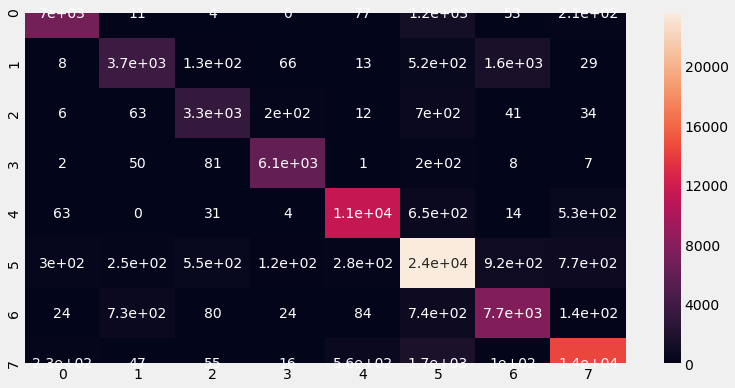

In [461]:
plt.figure(figsize=(12, 6))
sn.heatmap(cm, annot=True)

In [75]:
{"Gender_m":0,
 "Gender_f":1,
 "Age":21,
 "Height":180.0,
 "Skin":3,
 "Sport":4,
 "ACC_chest_0":1.035176,
 "ACC_chest_1":-0.005739,
 "ACC_chest_2":-0.218289,
 "ACC_wrist_0":-0.193359,
 "ACC_wrist_1":-0.910156,
 "ACC_wrist_2":0.218750,
 "BVP":12.024375,
 "ECG":0.085356,
 "Resp":-8.468131,
 "Label":130.437595
}

{'Gender_m': 0,
 'Gender_f': 1,
 'Age': 21,
 'Height': 180.0,
 'Skin': 3,
 'Sport': 4,
 'ACC_chest_0': 1.035176,
 'ACC_chest_1': -0.005739,
 'ACC_chest_2': -0.218289,
 'ACC_wrist_0': -0.193359,
 'ACC_wrist_1': -0.910156,
 'ACC_wrist_2': 0.21875,
 'BVP': 12.024375,
 'ECG': 0.085356,
 'Resp': -8.468131,
 'Label': 130.437595}

In [79]:
X_train2.columns

Index(['Gender_m', 'Gender_f', 'Age', 'Height', 'Skin', 'Sport', 'ACC_chest_0',
       'ACC_chest_1', 'ACC_chest_2', 'ACC_wrist_0', 'ACC_wrist_1',
       'ACC_wrist_2', 'BVP', 'ECG', 'Resp', 'Labels'],
      dtype='object')

In [80]:
Y_train2

18560     6
64224     8
82363     5
61903     7
406129    0
         ..
454128    6
384299    6
165258    6
451575    6
486506    6
Name: Activ, Length: 372450, dtype: int64